<h1> Thompson Sampling- Bernoulli Bandit </h1>

-in a bernoulli bandit the reward returned by any arm is either 1 or 0

-the case of bernoulli bandit has been considered to simplify the algorithms

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [3]:
def normalise(array):
    maximum=max(array)
    minimum=min(array)
    for i in range(len(array)):
        array[i]=(array[i]-minimum)/(maximum-minimum)
    return array

In [4]:
def epsilon_greedy_bernoulli(k,eps,iterations,c_rate):
    
    #k=number of arms
    #eps=exploration fraction-> algorithm will explore with a probability of eps and exploit with a probability of (1-eps)
    #iterations= number of pulls of the arms
    #c_rate->array of conversion rates for the bernoulli bandit
    
    if len(c_rate)!=k: #case wwhen mu is user defined
        print("The length of the entered array of conversion rates does not match with the number of arms entered \n")
        return
    
    q=np.zeros(k) #the array of the estimated expected values of each arm
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.zeros(k) #stores the number of times each arm has been pulled till the current iteration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    
    for step in range(iterations):
        p=np.random.rand() #randomly generates a number between 0 and 1
        
        if eps==0 and step==0: #eps value indicated exploitation but since the steps are also zero there is no knowledge to exploit-randomly select any arm
            a=np.random.choice(k) #action is chosen
        
        elif p<eps: #case of exploration
            a=np.random.choice(k) #action is chosen randomly from the k arms
            
        else: #case of exploitation
            a=np.argmax(q) #returns the action with the highest estimated expected value at current iteration
        
        p=np.random.rand() 
        if p<c_rate[a]: #lies in the range of conversion rate
            reward=1
        else:
            reward=0
        
        #updating counts
        pulls+=1
        arm_pull_number[a]+=1
        
        #updating the rewards
        total_reward+=reward
        avg_reward[step]=total_reward/pulls
        
        
        #updating the estimated value of arm a pulled at the current iteration
        q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return q,avg_reward,arm_pull_number 

In [5]:
def ucb_1_bernoulli(k,iterations,c_rate):
    
    #k=number of arms
    #iterations= number of pulls of the arms
    #c_rate->array of conversion rates for the bernoulli bandit
    
    if len(c_rate)!=k: #case wwhen mu is user defined
        print("The length of the entered array of true expected values does not match with the number of arms entered \n")
        return
    
    q=np.zeros(k) #the array of the estimated expected values of each arm
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.zeros(k) #stores the number of times each arm has been pulled till the current iteration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    
    for step in range(iterations):
        
        if step==0: #at first step we have to play each arm atleast once
            for a in range(k):
                p=np.random.rand()
                if p<c_rate[a]: #lies in the range of conversion rate
                    reward=1
                else:
                    reward=0
                #updating counts
                pulls+=1
                arm_pull_number[a]+=1
                #updating the rewards
                total_reward+=reward
                avg_reward[step]=total_reward/pulls
                #updating the estimated value of arm a pulled at the current iteration
                q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
        
        else:
            
            upper_bound_arm=q+np.sqrt(np.divide(2*np.log(step),arm_pull_number))
            a=np.argmax(upper_bound_arm) #choosoing the arm with maximum upper bound
        
            p=np.random.rand()
            if p<c_rate[a]: #lies in the range of conversion rate
                reward=1
            else:
                reward=0
        
            #updating counts
            pulls+=1
            arm_pull_number[a]+=1
        
            #updating the rewards
            total_reward+=reward
            avg_reward[step]=total_reward/pulls
        
            #updating the estimated value of arm a pulled at the current iteration
            q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return q,avg_reward,arm_pull_number 

In [6]:
def epsilon_greedy_decay_bernoulli(k,iterations,c_rate):
    
    #k=number of arms
    #iterations= number of pulls of the arms
    #c_rate->array of conversion rates for the bernoulli bandit


    if len(c_rate)!=k: #case wwhen mu is user defined
        print("The length of the entered array of conversion rates does not match with the number of arms entered \n")
        return
    
    q=np.zeros(k) #the array of the estimated expected values of each arm
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.zeros(k) #stores the number of times each arm has been pulled till the current iteration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    beta=1/k #scaling factor
    
    #decayed epsilon=1/(1+n*beta) ->n=steps taken till the current iteration
    
    for step in range(iterations):
        p=np.random.rand() #randomly generates a number between 0 and 1
        
        if p<1/(1+step*beta): #case of exploration
            a=np.random.choice(k) #action is chosen randomly from the k arms
            
        else: #case of exploitation
            a=np.argmax(q) #returns the action with the highest estimated expected value at current iteration
        
        p=np.random.rand()
        if p<c_rate[a]:
            reward=1
        else:
            reward=0
          
        
        #updating counts
        pulls+=1
        arm_pull_number[a]+=1
        
        #updating the rewards
        total_reward+=reward
        avg_reward[step]=total_reward/pulls
        
        
        #updating the estimated value of arm a pulled at the current iteration
        q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return q,avg_reward,arm_pull_number 

In [7]:
def thompson_sampling(k,iterations,c_rate):
    
    #k=number of arms
    #iterations= number of pulls of the arms
    #c_rate=conversion rate of each arm
    
    if len(c_rate)!=k: #case wwhen mu is user defined
        print("The length of the entered array of conversion rates does not match with the number of arms entered \n")
        return
    
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.zeros(k) #stores the number of times each arm has been pulled till the current iteration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    
    #alpha and beta for each of the arms has been initialised to 1
    #this will correspond to each arm having a uniform distribution initially
    alpha_arm=np.ones(k)
    beta_arm=np.ones(k)
            
    for step in range(iterations):
        
        #choose the arm which maximises the value returned from the beta function
        beta_val_arm=np.ones(k) #holds the value from the beta distribution for each arm
        for i in range(k):
            beta_val_arm[i]=np.random.beta(alpha_arm[i],beta_arm[i])
            
        a=np.argmax(beta_val_arm)
        #pull the arm
        p=np.random.rand()
        
        if p<c_rate[a]: #reward=1->converted as lies in range of conversion rate of the machine
            reward=1
            #updating alpha
            alpha_arm[a]+=1
            
        else: #reward=0-> not converted as does not lie in the conversion range of the machine
            reward=0
            #updating beta
            beta_arm[a]+=1
            
        #updating pulls
        pulls+=1
        arm_pull_number[a]+=1
            
        #updating rewards
        total_reward+=reward
        avg_reward[step]=total_reward/pulls
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return avg_reward,arm_pull_number 

In [9]:
k=10 #number of arms
episodes=1000 #no of times the total experiments are conducted
iterations=10000 #no of pulls in 1 episode
c_rate=np.random.uniform(0.01,0.15,k)
#creates random conversion rates for all the machines between 1 and 15 percent
#the gambler does not know about these conversion rates


#long term rewards- avg rewards over all the episodes
reward_long_thompson=np.zeros(iterations)
reward_1_long=np.zeros(iterations)
reward_decay_long=np.zeros(iterations)
reward_ucb1_long=np.zeros(iterations)

#long term arm pulls- avg number of pulls of each arm over all the episodes
arm_pulls_thompson_long=np.zeros(k)
arm_pulls1_long=np.zeros(k)
arm_pulls_decay_long=np.zeros(k)
arm_pulls_ucb1_long=np.zeros(k)


for i in tqdm(range(episodes)):
    avg_reward_thompson,arm_pull_number_thompson=thompson_sampling(k,iterations,c_rate)
    q_1,avg_reward_1,arm_pull_number1=epsilon_greedy_bernoulli(k,0.1,iterations,c_rate)
    q_decay,avg_reward_decay,arm_pull_number_decay=epsilon_greedy_decay_bernoulli(k,iterations,c_rate)
    q_ucb1,avg_reward_ucb1,arm_pull_number_ucb1=ucb_1_bernoulli(k,iterations,c_rate)

    #updating the long term rewards
    reward_long_thompson=reward_long_thompson+(avg_reward_thompson-reward_long_thompson)/(i+1)
    reward_1_long=reward_1_long+(avg_reward_1-reward_1_long)/(i+1)
    reward_decay_long=reward_decay_long+(avg_reward_decay-reward_decay_long)/(i+1)
    reward_ucb1_long=reward_ucb1_long+(avg_reward_ucb1-reward_ucb1_long)/(i+1)
    
    #updating the long term arm pulls
    arm_pulls_thompson_long=arm_pulls_thompson_long+(arm_pull_number_thompson-arm_pulls_thompson_long)/(i+1)
    arm_pulls1_long=arm_pulls1_long+(arm_pull_number1-arm_pulls1_long)/(i+1)
    arm_pulls_decay_long=arm_pulls_decay_long+(arm_pull_number_decay-arm_pulls_decay_long)/(i+1)
    arm_pulls_ucb1_long=arm_pulls_ucb1_long+(arm_pull_number_ucb1-arm_pulls_ucb1_long)/(i+1)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:17<00:00,  2.29it/s]


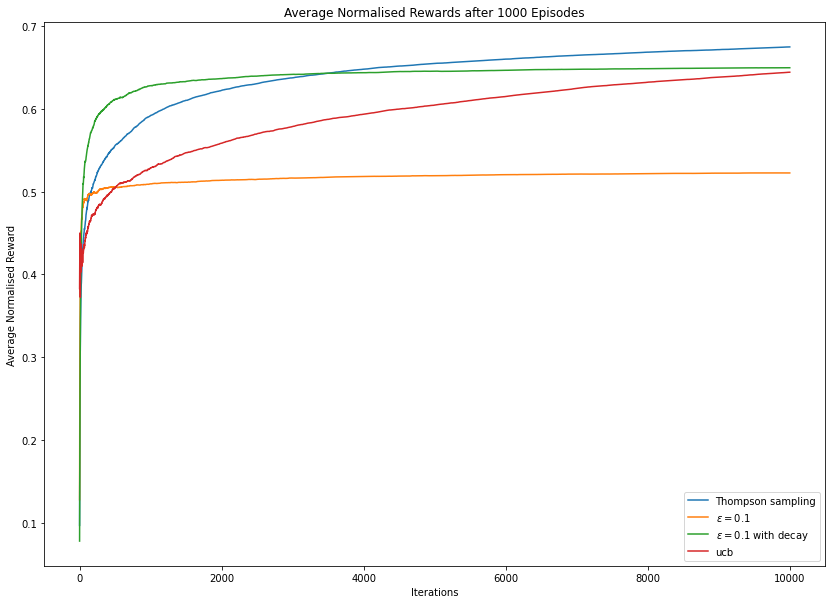

In [10]:
plt.figure(figsize=(14,10))
plt.plot(reward_long_thompson, label="Thompson sampling")
plt.plot(reward_1_long, label="$\epsilon=0.1$")
plt.plot(reward_decay_long, label="$\epsilon=0.1$ with decay")
plt.plot(reward_ucb1_long, label="ucb")
plt.xlabel("Iterations")
plt.ylabel("Average Normalised Reward")
plt.title("Average Normalised Rewards after " + str(episodes) + " Episodes")
plt.legend()
plt.show()

<h1> Percentage Arm Pulls-Epsilon Decay Method </h1>

In [11]:
c_rate

array([0.14708755, 0.14070765, 0.08062144, 0.12958538, 0.11999983,
       0.01378948, 0.03456548, 0.0164836 , 0.10314459, 0.14040392])

In [12]:
optimal=np.argmax(c_rate)
optimal

0

In [13]:
optimal_thompson=np.argmax(arm_pulls_thompson_long)
print("optimal arm according to thompson sampling: ")
print(optimal_thompson)

optimal arm according to thompson sampling: 
0


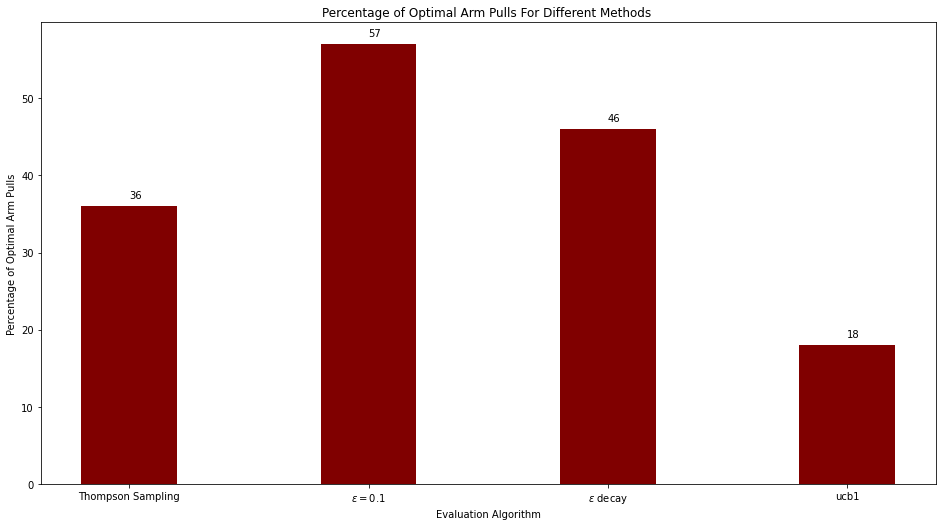

In [15]:
#calculating the percentage optimum arm pulls over the total number of pulls for each epsilon

percent_optimal_pull_thompson=round((arm_pulls_thompson_long[optimal]/np.sum(arm_pulls_thompson_long))*100)
percent_optimal_pull_1=round((arm_pulls1_long[optimal]/np.sum(arm_pulls1_long))*100)
percent_optimal_pull_decay=round((arm_pulls_decay_long[optimal]/np.sum(arm_pulls_decay_long))*100)
percent_optimal_pull_ucb1=round((arm_pulls_ucb1_long[optimal]/np.sum(arm_pulls_ucb1_long))*100)


eps_val = ["Thompson Sampling","$\epsilon=0.1$","$\epsilon$ decay","ucb1"]
percent_optimal_pull=[percent_optimal_pull_thompson,percent_optimal_pull_1,percent_optimal_pull_decay,percent_optimal_pull_ucb1]
  
#Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (13,7))
ax.bar(eps_val,percent_optimal_pull,color="maroon",width=0.4)
#plt.text() , you need to give (x,y) location , where you want to put the numbers,
#So here index will give you x pos and data+1 will provide a little gap in y axis.
for index,data in enumerate(percent_optimal_pull):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.xlabel("Evaluation Algorithm")
plt.ylabel("Percentage of Optimal Arm Pulls")
plt.title("Percentage of Optimal Arm Pulls For Different Methods ")
plt.show()

<h1> Beta Distribution Plot </h1>

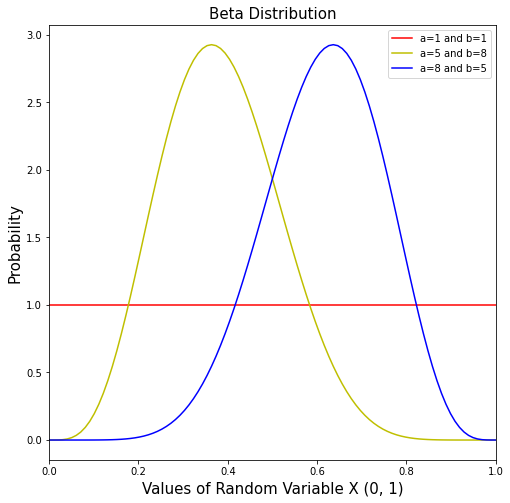

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
#
# Set the shape paremeters
#
a1, b1 = 1, 1
a2, b2 = 5, 8
a3, b3 = 8, 5
#
# Generate the value between
#
x1 = np.linspace(beta.ppf(0, a1, b1),beta.ppf(1, a1, b1), 100)
x2 = np.linspace(beta.ppf(0, a2, b2),beta.ppf(1, a2, b2), 100)
x3 = np.linspace(beta.ppf(0, a3, b3),beta.ppf(1, a3, b3), 100)
#
# Plot the beta distribution
#
plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.plot(x1, beta.pdf(x1, a1, b1), 'r-',label="a=1 and b=1")
plt.plot(x2, beta.pdf(x2, a2, b2), 'y-',label="a=5 and b=8")
plt.plot(x3, beta.pdf(x3, a3, b3), 'b-',label="a=8 and b=5")
plt.title('Beta Distribution', fontsize='15')
plt.legend()
plt.xlabel('Values of Random Variable X (0, 1)', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()